In [4]:

import pandas as pd
from portfolio import Portfolio
from strategies.nfixedbaskets import StrategyNFixedBaskets
from strategies.lasso_factors import StrategyLassoFactors

import warnings
warnings.filterwarnings('ignore')

In [5]:
# ---------------------------------------------------------------------------- #
#                                     Data                                     #
# ---------------------------------------------------------------------------- #
X = pd.read_csv("data_semi.csv")
X=X.dropna()
X.date = pd.to_datetime(X.date)
X

,Unnamed: 0,order_book_id,date,AT,dolvol,D2A,Free_CF,OL,ATO,egr,...,Mdp,FC2Y,roa,r_12_7,Lturnover,operprof,saleinv,PM,S2P,exret
0,0.0,000001.XSHE,2006-12-29,0.994030,0.984080,-0.964179,0.219900,-0.005970,-0.996020,-0.351244,...,0.000995,0.021891,-0.430846,-0.755224,0.787065,0.381095,0.003980,0.397015,-0.329353,0.320314
1,1.0,000001.XSHE,2007-01-31,0.994042,0.986097,-0.964250,0.219464,-0.012910,-0.996028,-0.346574,...,0.000993,0.012910,-0.424032,-0.809335,0.751738,0.368421,-0.001986,0.384310,-0.386296,-0.005894
2,2.0,000001.XSHE,2007-02-28,0.994030,0.986070,-0.958209,0.211940,-0.007960,-0.994030,-0.375124,...,0.000995,0.015920,-0.430846,-0.779104,0.615920,0.353234,-0.009950,0.367164,-0.297512,-0.010693
3,3.0,000001.XSHE,2007-03-30,0.990225,0.974585,-0.962854,0.216031,-0.002933,-0.990225,0.859238,...,0.000978,0.004888,-0.448680,-0.442815,0.298143,0.108504,-0.001955,0.362659,-0.436950,0.372638
4,4.0,000001.XSHE,2008-03-31,0.990645,0.985033,-0.977549,0.438728,-0.004677,-0.985033,0.900842,...,0.000935,0.014032,-0.519177,0.711880,0.745557,0.111319,-0.005613,0.610851,-0.438728,0.047803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27515,27515.0,000600.XSHE,2022-07-29,0.747943,0.838763,0.747285,-0.351102,0.086542,0.556433,-0.851267,...,0.000329,-0.552484,-0.247779,-0.156960,0.924975,-0.081935,0.681474,-0.725568,0.834156,-0.045190
27516,27516.0,000600.XSHE,2022-08-31,0.736097,0.434024,0.565647,-0.639355,0.153011,0.562356,-0.858506,...,0.000329,-0.533399,-0.665679,-0.048371,0.417572,-0.080619,0.680816,-0.584074,0.853241,-0.088574
27517,27517.0,000600.XSHE,2022-09-30,0.736704,0.406435,0.565988,-0.638214,0.152331,0.563362,-0.857518,...,0.000328,-0.533158,-0.665791,-0.863427,0.400525,-0.081418,0.680893,-0.585030,0.850952,0.164377
27518,27518.0,000600.XSHE,2022-10-31,0.738588,0.763547,0.764204,-0.140887,0.142857,0.585550,-0.856814,...,0.000328,-0.513957,0.388506,-0.228243,0.818719,-0.081773,0.681445,-0.650575,0.828571,0.140869


In [8]:
portfolio_1 = Portfolio()
portfolio_1.run(StrategyNFixedBaskets, X)


100%|██████████| 70/70 [00:00<00:00, 6732.12it/s]


Portfolio well defined.


KeyboardInterrupt: 

In [ ]:
portfolio_1.stats

{'Portfolio Rate of Return': 0.01038099113075054,
 'Portfolio std': 0.0678347688504211,
 'Portfolio Sharpe': 0.15303348572825715,
 'Mean Portfolio Size': 134.67142857142858}

In [9]:
portfolio_2 = Portfolio()
portfolio_2.run(StrategyLassoFactors, X, args=[0.015])

Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.
1.6657330417973715
0.13773787071669755
Activated.


In [10]:
portfolio_2.stats

{'Portfolio Rate of Return': 0.13773787071669755,
 'Portfolio std': 0.07334311397759906,
 'Portfolio Sharpe': 1.8779932190875666,
 'Mean Portfolio Size': 45.4}

In [11]:
import numpy as np
from tqdm import tqdm
alphas = np.logspace(-2, -1.7, 10)
sharpes = []
sizes = []

for alpha in tqdm(alphas):
    print(alpha)
    portfolio_3 = Portfolio()
    portfolio_3.run(StrategyLassoFactors, X, args=[alpha])
    sharpes.append(portfolio_3.stats['Portfolio Sharpe'])
    sizes.append(portfolio_3.stats["Mean Portfolio Size"])

  0%|          | 0/5 [00:00<?, ?it/s]

0.01
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.


 20%|██        | 1/5 [06:47<27:09, 407.35s/it]

1.600413411902342
0.12422346453151906
Activated.
0.01778279410038923
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.


 40%|████      | 2/5 [13:36<20:25, 408.57s/it]

1.6527999546390642
0.13506205958049605
Activated.
0.03162277660168379
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.


 60%|██████    | 3/5 [20:27<13:39, 409.63s/it]

1.5902652492921625
0.12212384468113707
Activated.
0.05623413251903491
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.


 80%|████████  | 4/5 [27:17<06:49, 409.88s/it]

1.3715769268601519
0.07687798486761763
Activated.
0.1
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
Portfolio well defined.


100%|██████████| 5/5 [34:22<00:00, 412.54s/it]

1.0341663612398233
0.007068902325480684
Activated.


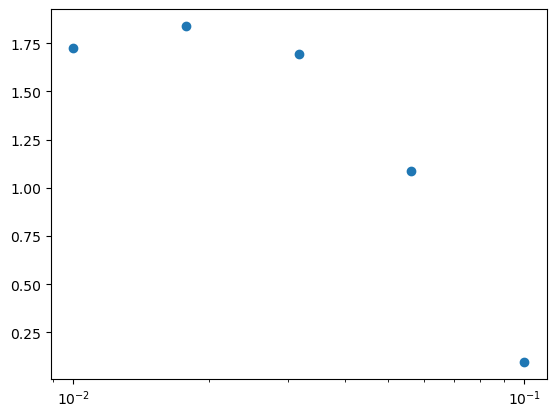

In [12]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.scatter(x=alphas, y=sharpes)
#ax.scatter(x=alphas, y=sizes)
ax.set_xscale('log')

In [13]:
portfolio_3.stats

{'Portfolio Rate of Return': 0.007068902325480684,
 'Portfolio std': 0.07236255722691719,
 'Portfolio Sharpe': 0.0976872929367844,
 'Mean Portfolio Size': 46.857142857142854}

In [ ]:
num_stocks_used = len(set([item for values in portfolio_3.portfolio.values() for item in values.values()]))

In [15]:
alphas_2 = [0, 0.5, 1]
sharpes_2 = []
sizes_2 = []

for alpha in tqdm(alphas_2):
    print(alpha)
    portfolio_4 = Portfolio()
    portfolio_4.run(StrategyLassoFactors, X, args=[alpha])
    sharpes_2.append(portfolio_4.stats['Portfolio Sharpe'])
    sizes_2.append(portfolio_4.stats["Mean Portfolio Size"])

  0%|          | 0/3 [00:00<?, ?it/s]

0
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


 33%|███▎      | 1/3 [03:24<06:49, 204.90s/it]

1.228294212582291
0.04723328536185333
Activated.
0.5
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


 67%|██████▋   | 2/3 [06:27<03:11, 191.66s/it]

0.724192169370936
-0.05706368909566842
Activated.
1
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


100%|██████████| 3/3 [09:29<00:00, 189.89s/it]

0.724192169370936
-0.05706368909566842
Activated.


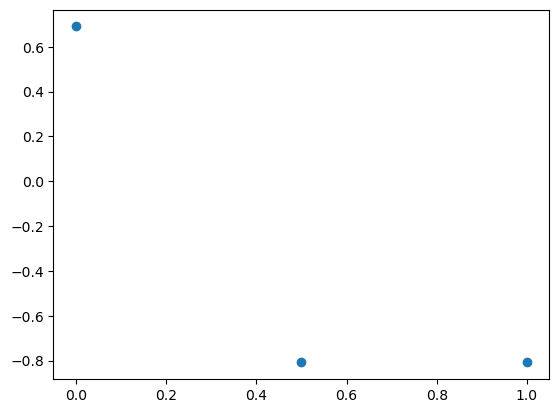

In [17]:
fig, ax = plt.subplots()
ax.scatter(x=alphas_2, y=sharpes_2)
#ax.scatter(x=alphas_2, y=sizes_2)

In [5]:
portfolio_1.data

,date,positions,n_positions,return,std,Sharpe
12,2011-09-30,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
13,2011-10-31,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
14,2011-11-30,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
15,2011-12-30,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
16,2012-01-31,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
17,2012-02-29,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
18,2012-03-30,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.000000,inf
19,2012-04-27,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,0.0,0.288675,0.000000
20,2012-05-31,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.288675,3.464102
21,2012-06-29,"{'000001.XSHE': 0.5, '000002.XSHE': 0.5}",2,1.0,0.288675,3.464102


In [6]:
import plotly.express as px

px.line(portfolio_1.data, x='date', y=['Sharpe'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Sharpe<br>date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Sharpe',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Sharpe',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2011, 9, 30, 0, 0),
                          datetime.datetime(2011, 10, 31, 0, 0),
                          datetime.datetime(2011, 11, 30, 0, 0),
                          datetime.datetime(2011, 12, 30, 0, 0),
                          datetime.datetime(2012, 1, 31, 0, 0),
                          datetime.datetime(2012, 2, 29, 0, 0),
                          datetime.datetime(2012, 3, 30, 0, 0),
                          datetime.datetime(2012, 4, 27, 0, 0),
                          datetime.datetime(2012, 5, 31, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 31, 0, 0),
                          datetime.datetime(2012, 8, 31, 0, 0),
                          datetime.datetime(2012, 9, 28, 0, 0),
                          datetime.datetime(2012, 10, 31, 0, 0),
                          datetime.datetime(2012, 11, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([       inf,        inf,        inf,        inf,        inf,        inf,
                                 inf, 0.        , 3.46410162, 3.46410162, 3.46410162, 4.69041576,
                          2.34520788, 2.34520788, 2.34520788]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

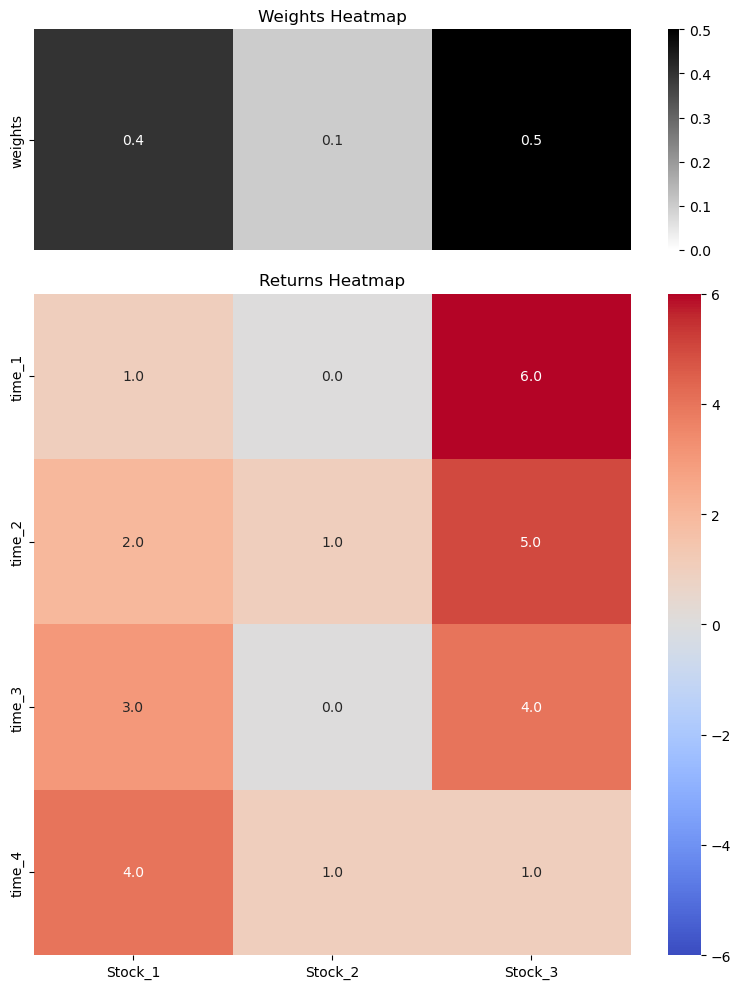

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the weights and returns data
weights = {"Stock_1": 0.4, "Stock_2": 0.1, "Stock_3": 0.5}
returns = pd.DataFrame(
    {"Stock_1": [1, 2, 3, 4], "Stock_2": [0, 1, 0, 1], "Stock_3": [6, 5, 4, 1]},
    index=["time_1", "time_2", "time_3", "time_4"],
)

# Create the combined dataframe for heatmap
df_heatmap = pd.concat(
    [pd.DataFrame(weights, index=["weights"]), returns.reindex(["time_1", "time_2", "time_3", "time_4"])]
)

# Set the desired column order
column_order = ["Stock_1", "Stock_2", "Stock_3"]

# Reorder the columns in the dataframe
df_heatmap = df_heatmap[column_order]

# Create the diverging color palettes
cmap_weights = sns.color_palette("gray_r", as_cmap=True)
cmap_returns = sns.color_palette("coolwarm", as_cmap=True)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [1, len(column_order)]})

# Plot the heatmap for weights
sns.heatmap(
    df_heatmap.iloc[:1, :],
    cmap=cmap_weights,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[0],
    xticklabels=False,
    vmin=0
)
axes[0].set_title("Weights Heatmap")

extreme_val = abs(returns).max().max()

# Plot the heatmap for returns
sns.heatmap(
    df_heatmap.iloc[1:, :],
    cmap=cmap_returns,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[1],
    vmin=-extreme_val,
    vmax=extreme_val
)
axes[1].set_title("Returns Heatmap")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

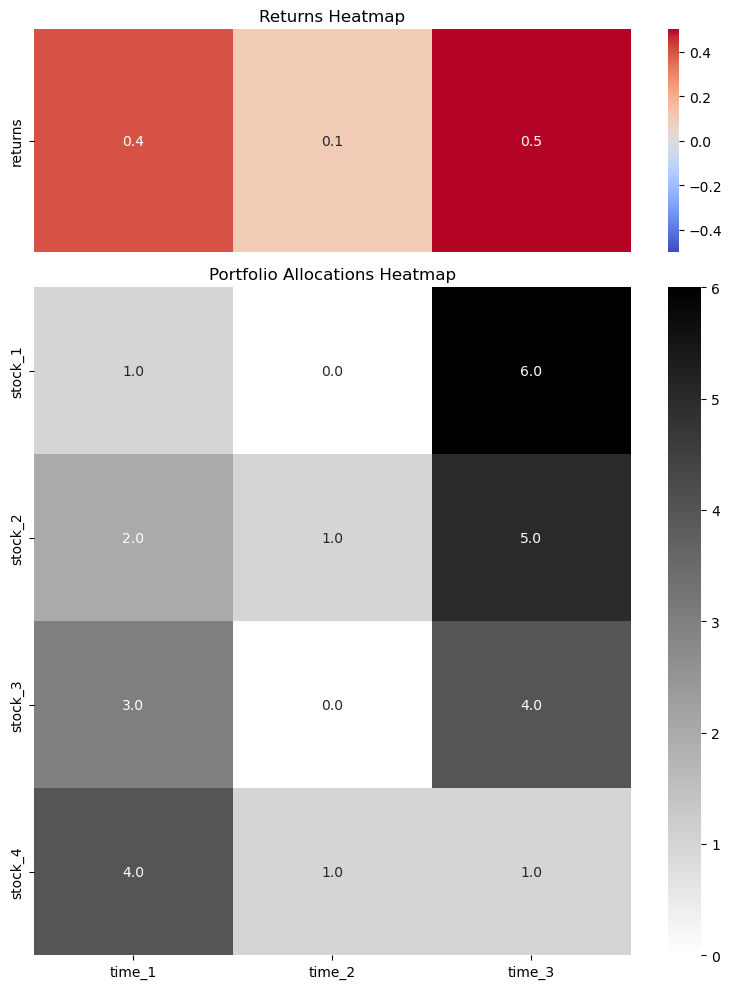

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the weights and returns data
returns = {"time_1": 0.4, "time_2": 0.1, "time_3": 0.5}
allocations = pd.DataFrame(
    {"time_1": [1, 2, 3, 4], "time_2": [0, 1, 0, 1], "time_3": [6, 5, 4, 1]},
    index=["stock_1", "stock_2", "stock_3", "stock_4"],
)

# Create the combined dataframe for heatmap
df_heatmap = pd.concat(
    [pd.DataFrame(returns, index=["returns"]), allocations.reindex(["stock_1", "stock_2", "stock_3", "stock_4"])]
)

# Set the desired column order
column_order = ["time_1", "time_2", "time_3"]

# Reorder the columns in the dataframe
df_heatmap = df_heatmap[column_order]

# Create the diverging color palettes
cmap_weights = sns.color_palette("coolwarm", as_cmap=True)
cmap_returns = sns.color_palette("gray_r", as_cmap=True)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [1, len(column_order)]})

extreme_val = abs(np.array(list((returns.values())))).max()

# Plot the heatmap for weights
sns.heatmap(
    df_heatmap.iloc[:1, :],
    cmap=cmap_weights,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[0],
    xticklabels=False,
    vmin=-extreme_val,
    vmax=extreme_val
)
axes[0].set_title("Returns Heatmap")

# Plot the heatmap for returns
sns.heatmap(
    df_heatmap.iloc[1:, :],
    cmap=cmap_returns,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[1],
    vmin=0
)
axes[1].set_title("Portfolio Allocations Heatmap")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

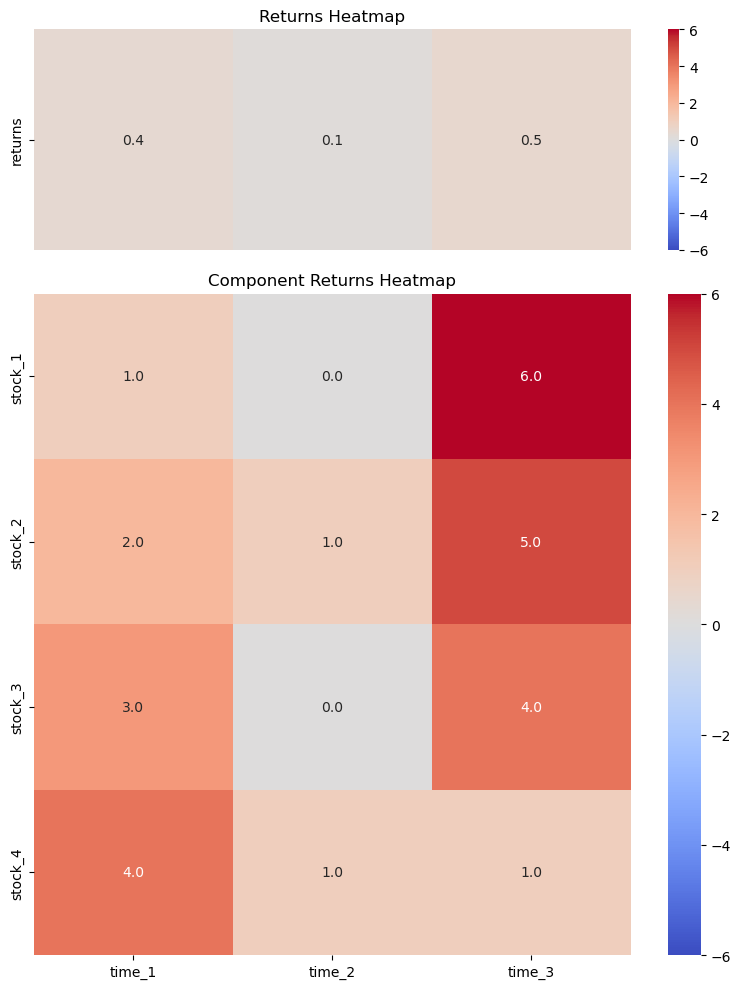

In [86]:
# Define the weights and returns data
returns = {"time_1": 0.4, "time_2": 0.1, "time_3": 0.5}
component_returns = pd.DataFrame(
    {"time_1": [1, 2, 3, 4], "time_2": [0, 1, 0, 1], "time_3": [6, 5, 4, 1]},
    index=["stock_1", "stock_2", "stock_3", "stock_4"],
)

# Create the combined dataframe for heatmap
df_heatmap = pd.concat(
    [pd.DataFrame(returns, index=["returns"]), component_returns.reindex(["stock_1", "stock_2", "stock_3", "stock_4"])]
)

# Set the desired column order
column_order = ["time_1", "time_2", "time_3"]

# Reorder the columns in the dataframe
df_heatmap = df_heatmap[column_order]

# Create the diverging color palettes
cmap_weights = sns.color_palette("coolwarm", as_cmap=True)
cmap_returns = sns.color_palette("coolwarm", as_cmap=True)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [1, len(column_order)]})

extreme_val = abs(np.array(list((returns.values())))).max()
component_returns_extreme = abs(component_returns).max().max()
global_extreme = np.array([extreme_val, component_returns_extreme]).max()

# Plot the heatmap for weights
sns.heatmap(
    df_heatmap.iloc[:1, :],
    cmap=cmap_weights,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[0],
    xticklabels=False,
    vmin=-global_extreme,
    vmax=global_extreme
)
axes[0].set_title("Returns Heatmap")

# Plot the heatmap for returns
sns.heatmap(
    df_heatmap.iloc[1:, :],
    cmap=cmap_returns,
    annot=True,
    fmt=".1f",
    cbar=True,
    ax=axes[1],
    vmin=-global_extreme,
    vmax=global_extreme
)
axes[1].set_title("Component Returns Heatmap")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [81]:
abs(component_returns.values())

TypeError: 'numpy.ndarray' object is not callable